# Laboratory #2_2 : Corner detection and ORB

At the end of this laboratory, you would get familiarized with

*   Corner Detection using FAST and Harris Corners
*   ORB feature detectors and descriptors

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1VljB1Q2OPulweJsn10joC-7nSBaa4rw-?usp=sharing)
---

In [ ]:
# mount drive to the notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import os
from skimage import color, data, feature, filters, io, transform
from skimage.color import rgb2gray, rgba2rgb
from skimage.io import imread, imread_collection

PATH = '/content/drive/MyDrive/UPC/First Semester/CV - Computational Vision/Lab Sessions/Session 5/images/'

In [ ]:
# function to plot images in a grid with a custom layout
def custom_grid(imgs, rows = 1, cols = 1, titles=None, order = None, figsize = (10,10), axis=False, cmap=False, overlay=False):
  fig = plt.figure(constrained_layout=True, figsize = figsize)
  if not order:
    order = [[i, [j,j+1]] for i in range(rows) for j in range(cols)]
  gs = GridSpec(rows, cols, figure=fig)
  k = imgs[0]
  for n,(i,j) in enumerate(zip(imgs[1],order)):
    im = fig.add_subplot(gs[j[0],j[1][0]:j[1][1]])
    if cmap:
      im.imshow(i, cmap=cmap)
    else:
      im.imshow(i)
    if overlay:
      im.imshow(k, cmap='gray')
      im.imshow(i, alpha=overlay[n], cmap='gray')
    if axis:
      im.axis('off')
    if titles:
      im.set_title(titles[n])



# Corner Detection

### Exercise: #1

*    Detect the corners in the image starbucks4.jpg. Use corner_fast to extract FAST corners for the given image and corner_peaks to find corners in the corner measure response image.
*   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.



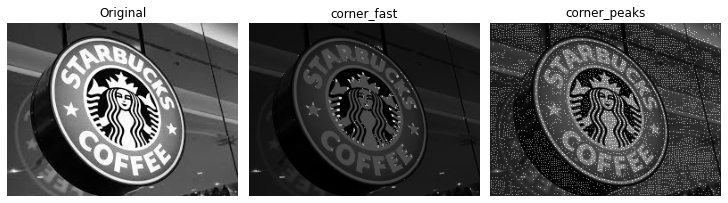

In [ ]:
# solution
starbucks4 = plt.imread(PATH+ 'starbucks/starbucks4.jpg')
starbucks4gray = rgb2gray(starbucks4)

cf_image = feature.corner_fast(starbucks4gray)

cp_image = feature.corner_peaks(starbucks4gray, indices=False)

titles = ['Original', 'corner_fast', 'corner_peaks']

custom_grid([starbucks4gray, [starbucks4gray, cf_image, cp_image]], 1, 3, axis='off', titles=titles, overlay=[1, 0.7, 0.5])


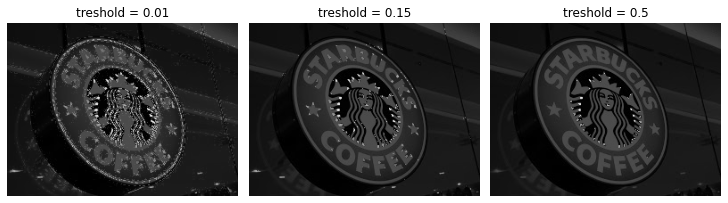

In [ ]:
tresholds = [0.01,0.15,0.5]

cornerFast_imgs = []

for n,t in enumerate(tresholds):
  cornerFast_imgs.append(feature.corner_fast(starbucks4gray, threshold=t))

titles = ['treshold = 0.01', 'treshold = 0.15', 'treshold = 0.5']

custom_grid([starbucks4gray, cornerFast_imgs], 1, 3, axis='off', titles=titles, overlay=[.7, 0.7, 0.7])

*   Analyze and discuss the effect of changing **'threshold'** in the corner_fast function.

**Solution**

*As seen in the images above, a lower threshold value results in more corner detections, while a higher threshold value results in fewer. Setting a very low threshold value may provide unfavorable results, since there are more detections that may be unwanted.*

...

*   Repeat the exercise by replacing FAST corners with Harris corners.

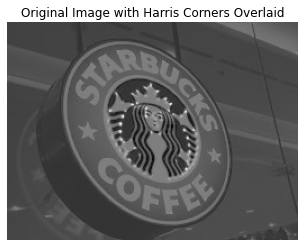

In [ ]:
# solution
h_image = feature.corner_harris(starbucks4gray)

plt.imshow(starbucks4gray, cmap='gray')
plt.imshow(h_image, cmap='gray', alpha=0.7)
plt.title('Original Image with Harris Corners Overlaid')
_ = plt.axis('off')

*   Do you find difference between both the techniques? If so, why and what difference do you observe?

**Solution**

*Both methods appear to have the same number of detections within the mermaid, but the fast corner method detects more corners in the text. This makes sense when we consider that Harris examines the image pixel by pixel, whereas FAST examines the pixel along with those within a certain radius around it. Since FAST is taking into account more of the environment, it will detect more corners.*

...

# ORB feature detector and binary descriptor

### Exercise #0: Compute ORB descriptors and find descriptors match

*   Load 'astronaut' image from data module.
*   Convert the image to grayscale.
*   Create a copy of the image and rotate it by 180&deg; 



In [ ]:
img1 = color.rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

*   Create an ORB feature detector with default parameters. *Hint: ORB feature detector is available in skimage.feature module.*



In [ ]:
descriptor_extractor = feature.ORB(n_keypoints=200)

*   Extract the keypoints and descriptors using detect_and_extract function for both the images

In [ ]:

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

*   Descriptors can be matched using match_descriptors function available in skimage.feature module
*   The matches can be plotted using the plot_matches function available in skimage.feature module

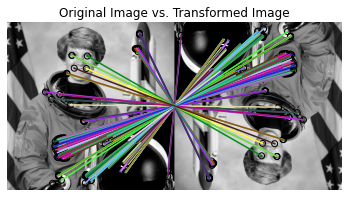

In [ ]:
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Transformed Image")
plt.show()

In [ ]:
ratios = [.1, .5, .9,5.]

for n,t in enumerate(ratios):
  matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True, max_ratio=t)
  print('max_ratio: ', t, ' -- Matches: ', matches12.shape[0])

max_ratio:  0.1  -- Matches:  198
max_ratio:  0.5  -- Matches:  198
max_ratio:  0.9  -- Matches:  198
max_ratio:  5.0  -- Matches:  198


### Exercise: #1

*   Analyze and discuss the effect of changing the parameter **'max_ratio'** in the match_descriptors function.

**Solution**

*According to the documentation for the match_descriptors funcntion, max_ratio is designed to become more sensitive to the number of matches returned as the parameter value increases. As seen in the output above, however, changing max_ratio had no effect on the number of matches between the two example images. This is likely due to the 180° rotation, since in the rotation experiment below (Exercise #4), a similar number of matches was found when comparing the original image to itself versus comparing the original image to the one rotated by 180°.*

...

*   What do you infer from **'harris_k'**, **'n_scales'**, **'fast_n'**, **'fast_threshold'** parameters in ORB function?

**Solution**

*The harris_k parameter is intended to distinguish between edges and corners. A smaller value for this parameter will detect sharper corners.*

*The n_scales parameter defines how many different scales will be used for detection.*

*The fast_n parameter defines how many pixels on the circle surrounding the subject pixel should meet the threshold requirements in order for a corner to be detected.*

*The fast_threshold parameter defines a threshold for how dark or light a pixel on the circle surrounding the subject pixel must be in order to be considered. This value is used in conjunction with fast_n.*

...

### Exercise: #2
*   Using the above example, create a function get_ORB, that takes two images as parameters and returns the keypoints of both images and descriptor matches

In [ ]:
# solution
def get_ORB(img1, img2):
  descriptor_extractor.detect_and_extract(img1)
  keypoints1 = descriptor_extractor.keypoints
  descriptors1 = descriptor_extractor.descriptors

  descriptor_extractor.detect_and_extract(img2)
  keypoints2 = descriptor_extractor.keypoints
  descriptors2 = descriptor_extractor.descriptors

  matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)

  return keypoints1, keypoints2, matches12


In [ ]:
# function to plot images from matches function in a grid with a custom layout
def matches_grid(imgs, rows = 1, cols = 1, titles=None, order = None, figsize = (10,10), axis=False, autoTitles=False, rotations=False):
  fig = plt.figure(constrained_layout=True, figsize = figsize)
  if not order:
    order = [[i, [j,j+1]] for i in range(rows) for j in range(cols)]
  gs = GridSpec(rows, cols, figure=fig)
  keypoints1_l = []
  keypoints2_l = []
  matches_l = []
  if imgs[0].shape[2] == 4:
      k = rgb2gray(rgba2rgb(imgs[0]))
  else:
      k = rgb2gray(imgs[0])
  for img in imgs[1]:
    if img.shape[2] == 4:
      img = rgb2gray(rgba2rgb(img))
    else:
      img = rgb2gray(img)
    kp1,kp2,matches = get_ORB(k,img)
    keypoints1_l.append(kp1)
    keypoints2_l.append(kp2)
    matches_l.append(matches)
  for n,(i,j) in enumerate(zip(imgs[1],order)):
    if i.shape[2] == 4:
      i = rgb2gray(rgba2rgb(i))
    else:
      i = rgb2gray(i)
    im = fig.add_subplot(gs[j[0],j[1][0]:j[1][1]])
    feature.plot_matches(im, k, i, keypoints1_l[n], keypoints1_l[n], matches_l[n])
    if axis:
      im.axis('off')
    if titles:
      im.set_title(titles[n])
    if autoTitles:
      if type(autoTitles) == type(str('')):
        im.set_title(autoTitles + str(matches_l[n].shape[0]))
      else:
        im.set_title('Matches: ' + str(matches_l[n].shape[0]) + ' -- Degrees: ' + str(autoTitles[n]))
   

*   Using the above function, detect the correspondences between the model image 'starbucks.jpg' with the scene image 'starbucks4.jpg'
*   Plot the matches between the two images.

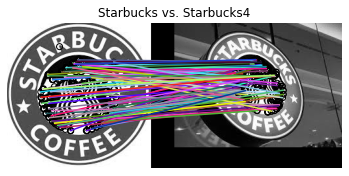

In [ ]:
# solution
starbucks = plt.imread(PATH + '/starbucks/starbucks.jpg')
starbucksgray = rgb2gray(starbucks)

sb_keypoints, sb4_keypoints, matches = get_ORB(starbucksgray, starbucks4gray)

feature.plot_matches(plt, starbucksgray, starbucks4gray, sb_keypoints, sb4_keypoints, matches)
plt.axis('off')
plt.title("Starbucks vs. Starbucks4")
plt.show()

### Exercise: #3

*   Using "starbucks.jpg" image as a model, show its matches to all Starbucks images. 
*   Show the number of the matches for the pair as title for each plot.

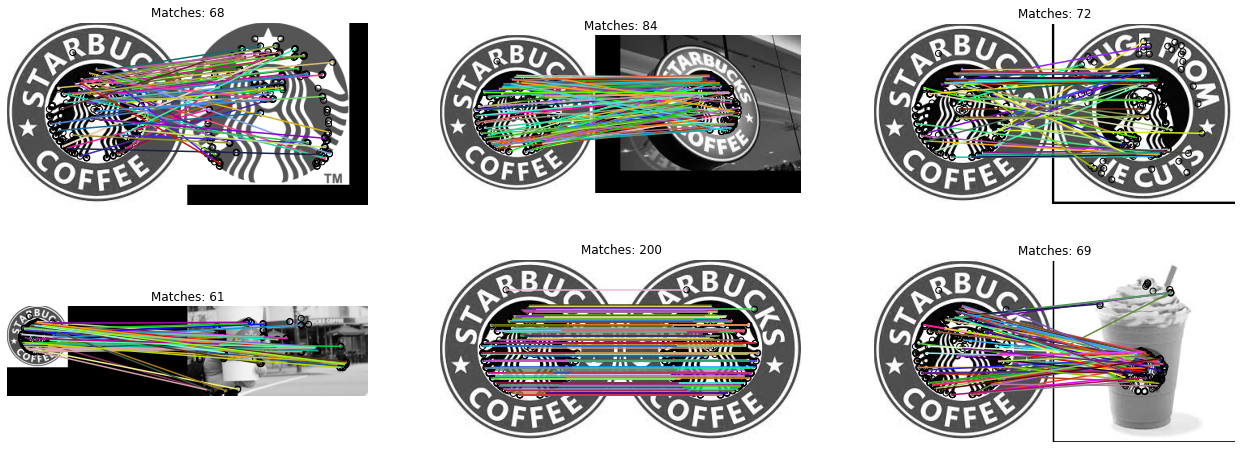

In [ ]:
# solution
folder_path = PATH + '/starbucks/*'
collection = imread_collection(folder_path)

fig, axs = plt.subplots(2,3, figsize = (22,8))

for n, img in enumerate(collection):
  if img.shape[2] == 4:
      img = rgb2gray(rgba2rgb(img))
  else:
      img = rgb2gray(img)
  kp1,kp2,mtch = get_ORB(starbucksgray, img)

  if n < 3:
    feature.plot_matches(axs[0,n%3], starbucksgray, img, kp1,kp2,mtch)
    axs[0,n%3].axis('off')
    axs[0,n%3].set_title('Matches: ' + str(mtch.shape[0]))
  else:
    feature.plot_matches(axs[1,n%3], starbucksgray, img, kp1,kp2,mtch)
    axs[1,n%3].axis('off')
    axs[1,n%3].set_title('Matches: ' + str(mtch.shape[0]))

*   Comment on the performance of the algorithm with respect to each image. When do you think the algorithm works better?

**Solution**

*The algorithm performs best when compared against the same image (as seen in position [1,1], with 200 matches. The next best has significantly worse performance, with 84 matches, in image [0,1]. This image is the same as the original, but with a different perspective. The worst performance is in image [1,0], likely because the logo is not projected onto a flat surface, in addition to the fact that the illumination is not the same as the original. The other three images have similar match values, likely because they vary in some combination of size and image structure.*

*Aside from comparing the original image with itself, the algorithm performs best when the image structure is the same, even regardless of perspective.*

...

### Exercise: #4

*   Repeate **Exercise #2**, by changing the orientation of the model image by rotating it and comparing it with its original version.
*   Create 8 orientations of the model image by rotating the image by 45&deg; (0, 45, 90, 135, 180, 225, 270, 315). *Hint: You can use the rotate() function from skimage.transform.*

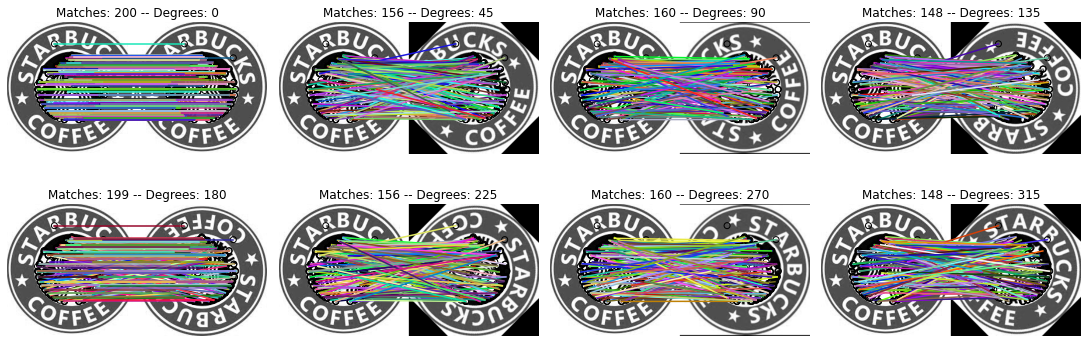

In [ ]:
# solution
degrees = [0, 45, 90, 135, 180, 225, 270, 315]

imgs = [starbucks] + [[transform.rotate(starbucks, degree) for degree in degrees]]

titles = ['Degrees: {}'.format(i) for i in degrees]

matches_grid(imgs, 2, 4, axis='off', figsize=(15,5), autoTitles=degrees)


*   What do you observe with respect to the change in orientations?

**Solution**

*The number of matches generally decreases when there is any degree of rotation, however, there is no direct relationship between number of matches and degree of rotation. There is almost an identical number of matches between a 0° rotation and a 180° rotation, showing that this transformation has little effect on the number of matches. It is also interesting to note that when rotations are the same across an axis, such as the 45° image and the 225° image, the number of matches is the same. Both of these scenarios (0°-180° and 45°-225°) likely occur because the corners in each image are oriented in the same way with respect to the axes of each image, resulting in similar matches.*

...

### Exercise: #5

*   Repeat **Exercise #3** using Coco-cola images using cocacola_logo.png as the model image.
*   Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?

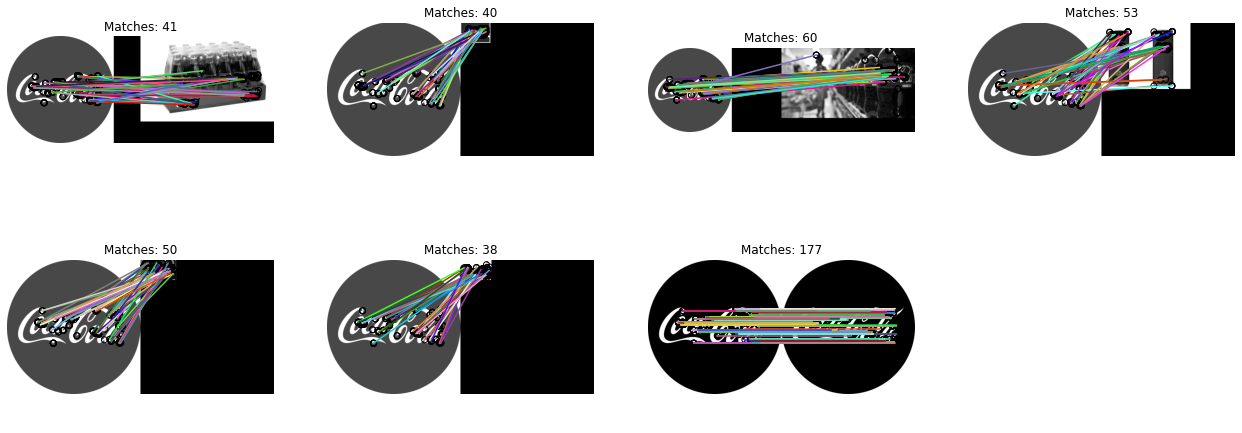

In [ ]:
fig, axs = plt.subplots(2,4, figsize = (22,8))
cocacolagray = rgb2gray(rgba2rgb(cocacola))

for n, img in enumerate(collection):
  if img.shape[2] == 4:
      img = rgb2gray(rgba2rgb(img))
  else:
      img = rgb2gray(img)
  kp1,kp2,mtch = get_ORB(cocacolagray, img)

  if n < 4:
    feature.plot_matches(axs[0,n%4], cocacolagray, img, kp1,kp2,mtch)
    axs[0,n%4].axis('off')
    axs[0,n%4].set_title('Matches: ' + str(mtch.shape[0]))
  else:
    feature.plot_matches(axs[1,n%4], cocacolagray, img, kp1,kp2,mtch)
    axs[1,n%4].axis('off')
    axs[1,n%4].set_title('Matches: ' + str(mtch.shape[0]))
_ = axs[1,3].axis('off')

**Solution**

*The same parameters used when analyzing the starbucks images were still effective when analyzing the cocacola images.*

...

### Exercise #6. Analysis of the applied techniques and results

*   What are the advantages of ORB object detection compared with HOG object detector?

**Solution**

*ORB is advantageous in that it is helpful not only in detecting edges, but detecting corners specifically. It also does not seem to be as sensitive to orientation, perspective, and size, as discussed above. In addition, the images compared can be very different from the template image in ORB and still result in adequate detections in many cases, whereas in HOG, deviations from the template are often not detected.*

...

*   What would happen if you analyse an image that does not contain the Starbucks logo (as is the case of "edificio.jpg")?

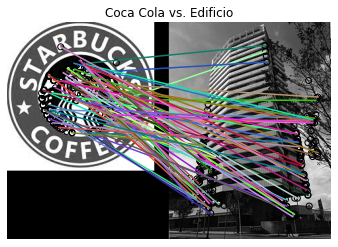

In [ ]:
# solution
edificio = plt.imread('/content/drive/MyDrive/Colab Notebooks/CV/p5/edificio.jpg')
edificiogray = rgb2gray(edificio)

cc_keypoints, ed_keypoints, matches = get_ORB(starbucksgray, edificiogray)

feature.plot_matches(plt, starbucksgray, edificiogray, cc_keypoints, ed_keypoints, matches)
plt.axis('off')
plt.title("Coca Cola vs. Edificio")
plt.show()



**Solution**

*It will still look for corner matches within the image, even if the corners are not the same as those detected in the original image, which can result in more false detections.*

...


*   What are the different ways of defining a quality measure for the correspondance between two images? (implementation of measures is not necessary)?

**Solution**

*One way to ensure quality matches is to set the max_ratio, max_distance, and metric parameters to values that, when used while comparing an image with itself, result in a satisfactory matching. These values can then be used with other images once this benchmark is established.*

...

# Panorama Stitching (Not graded)

Image Mosaicing is a technique of combining multiple overlapping images into a single image.

*   A simple tutorial can be found in this notebook: 
*   https://github.com/scikit-image/skimage-tutorials/blob/main/lectures/solutions/adv3_panorama-stitching-solution.ipynb


---

## **End of P2_2: Corner Detection and ORB**
Deadline for P2_2 submission in CampusVirtual is: **Thursday, the 27th of October, 2022**
